<a href="https://colab.research.google.com/github/karolmetzker/ProjetoML/blob/main/Dry_Bean_codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from scipy.io.arff import loadarff 
from scipy.io import arff

#Classes do modelo de aprendizado
from sklearn.linear_model import LogisticRegression, LinearRegression

#Classes do modelo de aprendizado
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier

#Funções de avaliação dos modelos
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = loadarff('/content/drive/My Drive/Colab Notebooks/Dry_Bean_Dataset.arff')
df = pd.DataFrame(data[0])
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,b'SEKER'
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,b'SEKER'
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,b'SEKER'
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,b'SEKER'
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,b'SEKER'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,b'DERMASON'
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,b'DERMASON'
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,b'DERMASON'
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,b'DERMASON'


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
print("Quantas classes existem nesse dataset?\n%d" %(len(df["Class"].unique())))#retorna valores únicos baseados numa tabela de dispersão
print("\nQuantas instâncias existem no dataset?\n%d" %(len(df))) #tamanho
print("\nQuantas caracteristicas(colunas) existem no dataset?\n%d" %(df.shape[1]))#retorna as dimensoes do data set,(150x5) como add [1] retorna 5, segundo valor da tupla, [0] retornaria o 150
print("\nQue features são essas?\n%s" %(str([k for k in df.keys()])))#uma por uma do nome das colunas
print("\nQual o numero de instâncias por classe?")
print(df["Class"].value_counts())#conta os valores od maior para o menor. 
#value_counts(normalize=True) > retorna a frequencia relativa dividindo todos os valores pela soma
#value_counts(bins=x) divide em grupos de x-1 em x-1 valores;(float)
#.value_counts(dropna=False) can also see NaN index values. dropna=True== apaga os vazios

Quantas classes existem nesse dataset?
7

Quantas instâncias existem no dataset?
13611

Quantas caracteristicas(colunas) existem no dataset?
17

Que features são essas?
['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']

Qual o numero de instâncias por classe?
b'DERMASON'    3546
b'SIRA'        2636
b'SEKER'       2027
b'HOROZ'       1928
b'CALI'        1630
b'BARBUNYA'    1322
b'BOMBAY'       522
Name: Class, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

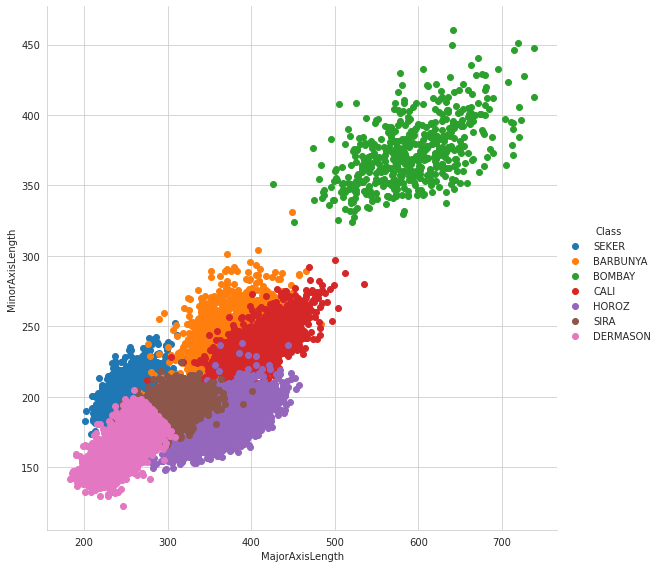

In [ ]:
# Distribuição das classes pelas features 
sns.set_style("whitegrid")
sns.FacetGrid(df, hue ="Class",
              height = 8).map(plt.scatter,
                              'MajorAxisLength',
                              'MinorAxisLength').add_legend()

In [4]:
# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
df['Class'] = pd.factorize(df['Class'])[0]
df
#3:0; 4:1, 5:2, 6:3, 7:4, 8:5,9:6

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,6
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,6
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,6
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,6


In [12]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
y = df.iloc[:,[16]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
#X = df.drop([df.columns[0]], axis = 1)
#y = df[df.columns[0]]

#Separando o conjunto de dados em treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y)

# **KFOLD**

In [13]:
def evaluate_model(kf):
    accuracies_list = []
    fold = 0
    for train, test in kf.split(X, y):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        model = DecisionTreeClassifier(random_state=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print("Fold %d: %.3f" %(fold, accuracy_score(y_test, y_pred)))
        
        accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1

    accuracies = np.array(accuracies_list)
    print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))

evaluate_model(KFold(n_splits=10))

Fold 0: 0.031
Fold 1: 0.105
Fold 2: 0.357
Fold 3: 0.502
Fold 4: 0.098
Fold 5: 0.003
Fold 6: 0.012
Fold 7: 0.605
Fold 8: 0.447
Fold 9: 0.000

Acurácia média (desvio): 0.216 +- (0.224)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)

In [ ]:
X = df.iloc[:,[2,3]]
y = df.iloc[:,[16]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

## **Métricas**

In [14]:

model = DecisionTreeClassifier(random_state=100)
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       504
           1       0.92      0.93      0.93       347
           2       1.00      1.00      1.00       129
           3       0.94      0.93      0.93       407
           4       0.93      0.92      0.93       484
           5       0.83      0.82      0.83       630
           6       0.89      0.89      0.89       902

    accuracy                           0.90      3403
   macro avg       0.92      0.92      0.92      3403
weighted avg       0.90      0.90      0.90      3403



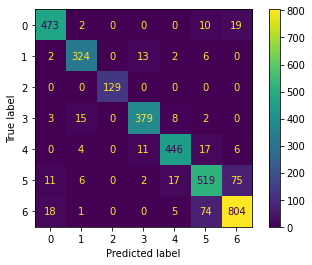

In [15]:
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
plot_roc_curve(model, X_test, y_test)

ValueError: ignored

In [16]:
model = KNeighborsClassifier()
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)


#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       504
           1       0.52      0.48      0.50       347
           2       1.00      1.00      1.00       129
           3       0.64      0.67      0.66       407
           4       0.74      0.68      0.70       484
           5       0.66      0.75      0.70       630
           6       0.84      0.87      0.85       902

    accuracy                           0.73      3403
   macro avg       0.74      0.73      0.73      3403
weighted avg       0.73      0.73      0.73      3403



ValueError: ignored

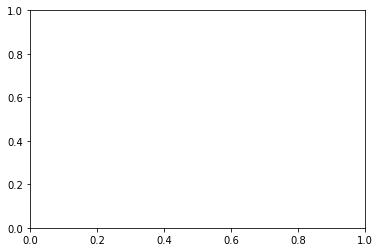

In [17]:
#PEGAR O CODIGO QUE RODA COM TODAS AS VARIAVEIS 

plot_decision_regions(np.array([X_test["MajorAxisLength"].values, X_test["MinorAxisLength"].values]).T, y_test.values.reshape(-1,1).T[0], model)
plt.xlabel("MajorAxisLength")
plt.ylabel("MinorAxisLength")

plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
plt.show()

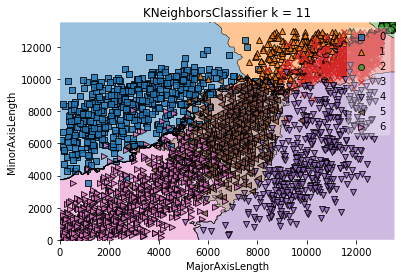

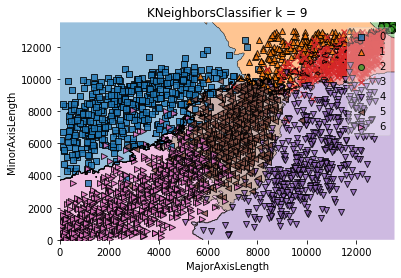

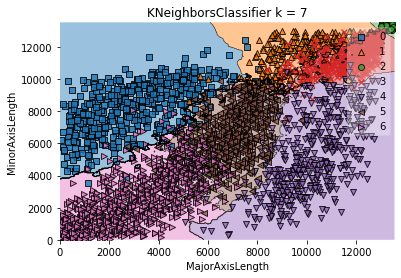

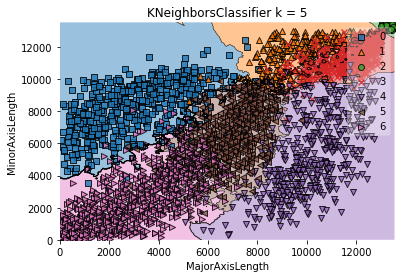

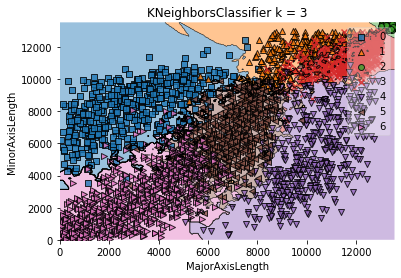

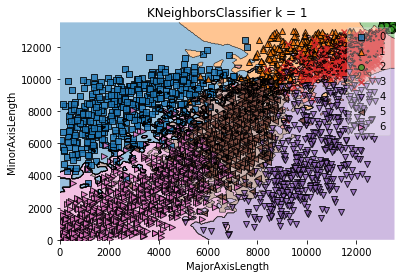

In [ ]:
for k in [11, 9, 7, 5, 3, 1]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    plot_decision_regions(np.array([X_test["MajorAxisLength"].values, X_test["MinorAxisLength"].values]).T, y_test.values.reshape(-1,1).T[0], model)
    plt.xlabel("MajorAxisLength")
    plt.ylabel("MinorAxisLength")

    plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
    plt.show()

**REGRESSÃO** **LOGÍSITICA** 

In [ ]:
model = LogisticRegression()
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

#Região de decisão

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       508
           1       0.36      0.69      0.47       299
           2       0.00      0.00      0.00       142
           3       0.33      0.67      0.45       399
           4       0.47      0.87      0.61       501
           5       0.36      0.25      0.29       673
           6       1.00      0.02      0.03       881

    accuracy                           0.46      3403
   macro avg       0.47      0.49      0.38      3403
weighted avg       0.58      0.46      0.37      3403



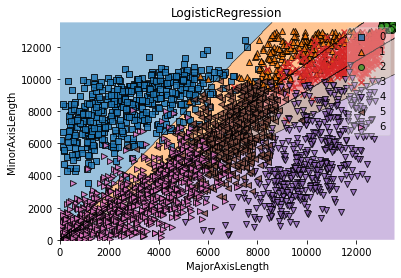

In [ ]:
plot_decision_regions(np.array([X_test["MajorAxisLength"].values, X_test["MinorAxisLength"].values]).T, y_test.values.reshape(-1,1).T[0], model)
plt.xlabel("MajorAxisLength")
plt.ylabel("MinorAxisLength")

plt.title(model.__class__.__name__)
plt.show()

**ÁRVORE DE DECISÃO**

In [ ]:
#Classes do modelo de aprendizado
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [ ]:
model = DecisionTreeClassifier()
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       508
           1       0.66      0.70      0.68       299
           2       1.00      1.00      1.00       142
           3       0.80      0.76      0.78       399
           4       0.94      0.89      0.92       501
           5       0.75      0.79      0.77       673
           6       0.87      0.87      0.87       881

    accuracy                           0.84      3403
   macro avg       0.85      0.84      0.84      3403
weighted avg       0.84      0.84      0.84      3403



In [ ]:
# KNN classifier model
knn = KNeighborsClassifier()

# K-fold (k=10)
scores = cross_val_score(knn, data, target, cv=10, scoring='accuracy')

# Results
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

NameError: ignored